In [91]:
from Final_Project.muon_propagation import *
from Final_Project.atm_muon import *
from Final_Project.geometry import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from scipy.stats import poisson


In [56]:
r_values = np.load('/home/maxwe/homework_code/Save_Data/hist-r.npy')
azi_bins = np.load('/home/maxwe/homework_code/Save_Data/hist-azi.npy')
zen_bins = np.load('/home/maxwe/homework_code/Save_Data/hist-zen.npy')

H_0 = np.sum((np.load(f'/home/maxwe/homework_code/Combined_Data/hist-{0}.npy')/64).flatten())

times = []
times_2 = []
for _,r in enumerate(r_values):
    errors = np.sqrt(H_0)
    H_Test = np.sum((np.load(f'/home/maxwe/homework_code/Combined_Data/hist-{_}.npy')/64).flatten())
    H_net =H_Test-H_0

    t = (3*np.sqrt(H_0)/H_net)**2
    times.append(t)
    t_2 = (5*np.sqrt(H_0)/H_net)**2
    times_2.append(t_2)

/tmp/ipykernel_5425/1556856201.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  t = (3*np.sqrt(H_0)/H_net)**2
/tmp/ipykernel_5425/1556856201.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  t_2 = (5*np.sqrt(H_0)/H_net)**2


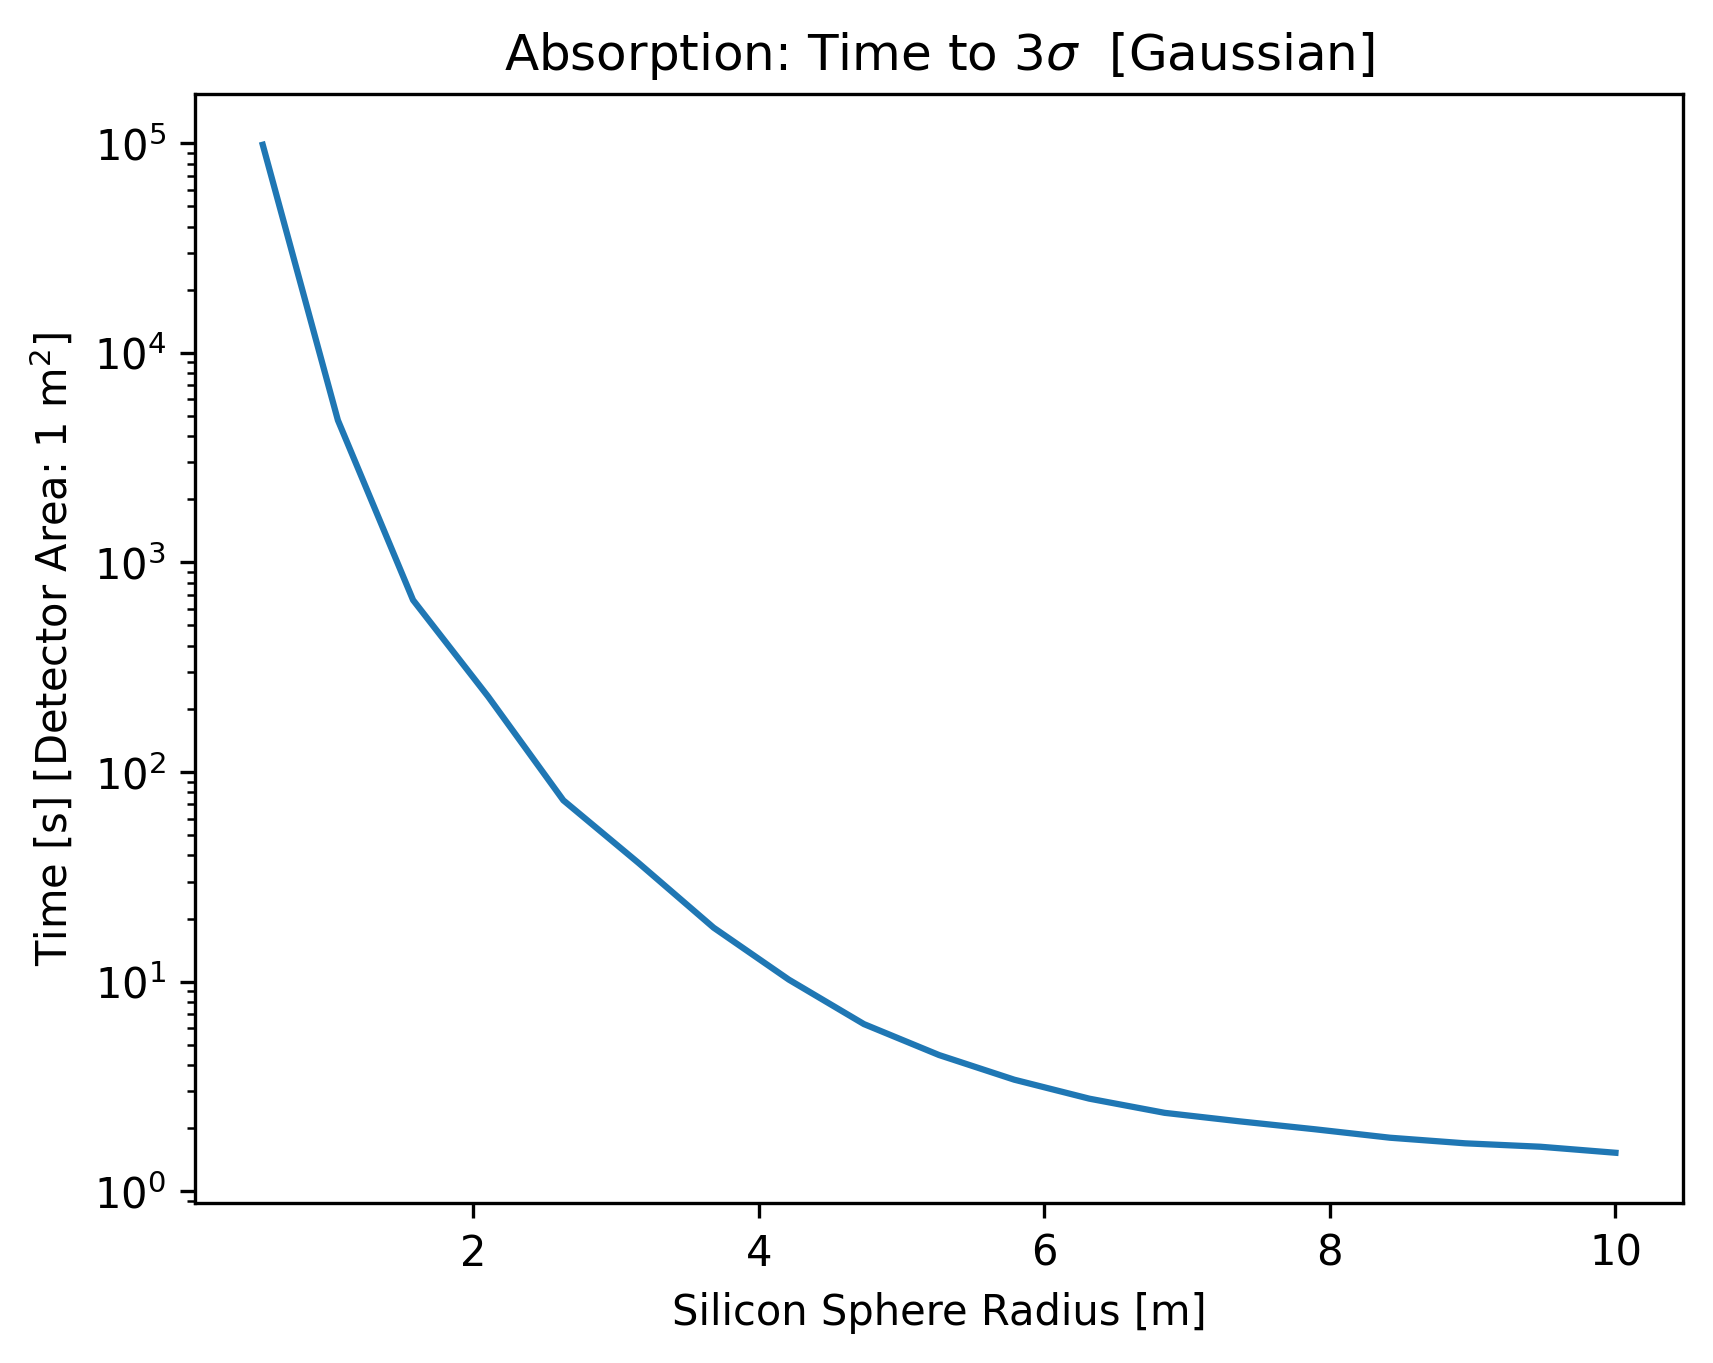

In [57]:

plt.figure(dpi = 300)
plt.plot(r_values, times)
plt.yscale('log')
plt.title(r'Absorption: Time to $3\sigma$  [Gaussian]')
plt.ylabel(r'Time [s] [Detector Area: 1 m$^2$]')
plt.xlabel(r'Silicon Sphere Radius [m]')
plt.show()


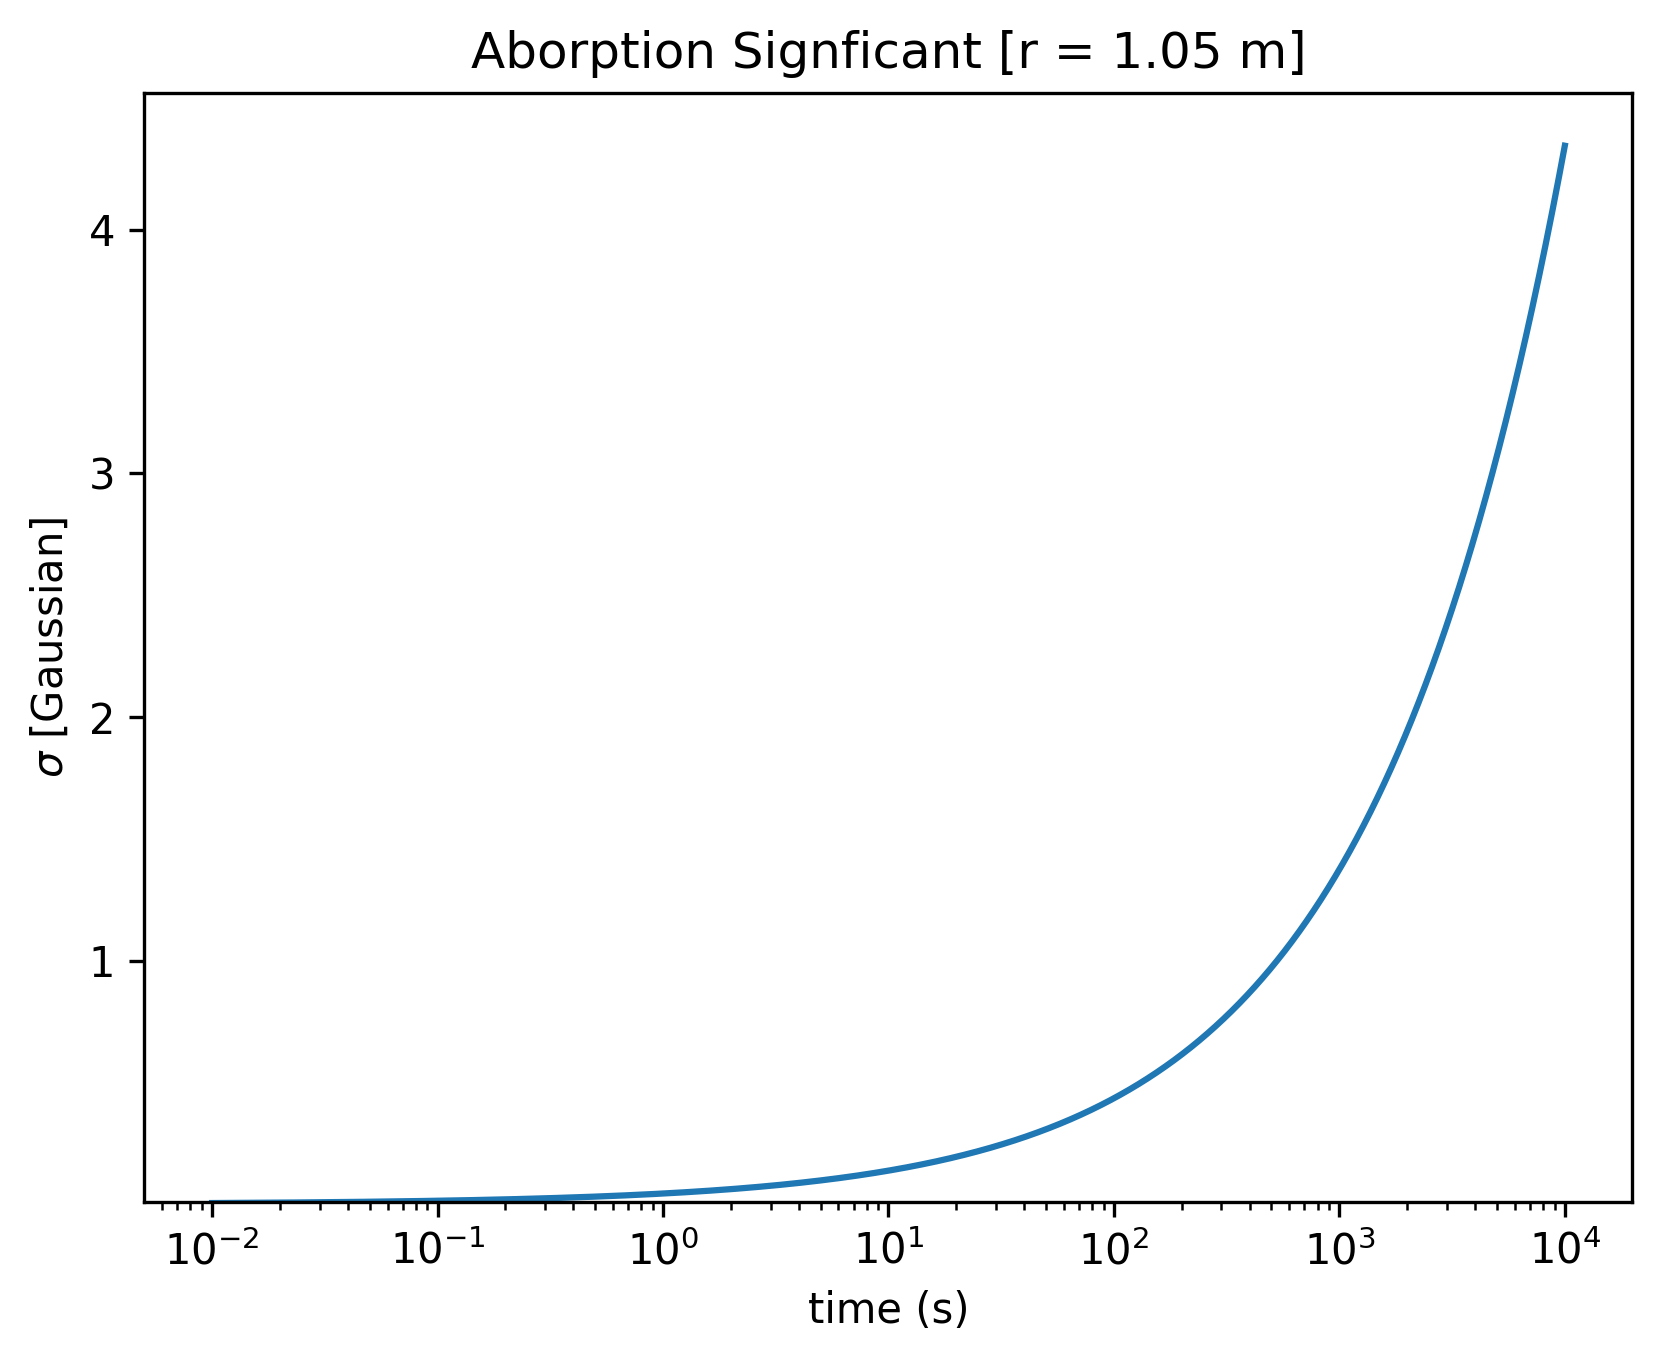

In [105]:
r_values = np.load('/home/maxwe/homework_code/Save_Data/hist-r.npy')
azi_bins = np.load('/home/maxwe/homework_code/Save_Data/hist-azi.npy')
zen_bins = np.load('/home/maxwe/homework_code/Save_Data/hist-zen.npy')

H_0 = np.sum((np.load(f'/home/maxwe/homework_code/Combined_Data/hist-{0}.npy')/64).flatten())


errors = np.sqrt(H_0)
H_Test = np.sum((np.load(f'/home/maxwe/homework_code/Combined_Data/hist-{2}.npy')/64).flatten())
H_net =H_Test-H_0

timing = np.geomspace(.01,1e4, 100000)
sig = np.abs((H_net)/np.sqrt(H_0)*np.sqrt(timing))
plt.figure(dpi = 300)
plt.plot(timing, sig)
#plt.yscale('log')
plt.title(f'Aborption Signficant [r = {np.round(r_values[2],2)} m]')
plt.ylabel(r'$\sigma$ [Gaussian]')
plt.xlabel(r'time (s)')
plt.xscale('log')
#plt.yscale('log')
plt.ylim(bottom=1e-2)
plt.show()


In [94]:
H_0 = (np.load(f'/home/maxwe/homework_code/Combined_Data/hist-{0}.npy')).flatten()

timing = np.geomspace(.01,1e4, 100000)
nllh_times = []
#for _,t in enumerate(timing):
t = 1
H_Test = (np.load(f'/home/maxwe/homework_code/Combined_Data/hist-{1}.npy')).flatten()
data = np.random.poisson(H_Test)

nllh = -2*np.sum(poisson.logpmf(data, mu=H_0)-)
print(norm.logpdf(H_Test*t, loc = 0, scale=H_0*t))
if _ == 0:
    nllh_base = nllh

nllh = nllh -nllh_base
nllh_times.append(nllh)
print(nllh)

[-0.31335814 -1.20162469 -0.61737552 -0.59718065 -1.65741993 -1.49715034
 -2.40421903 -2.71835491 -2.05131129 -1.67496282 -1.91142507 -1.64202584
 -1.33668372 -1.59215162 -1.66050466 -2.1814446  -2.52926992 -2.59326268
 -1.86836719 -1.16728394 -0.97484044 -0.63435591 -1.2259521  -0.74759931
 -0.79420813 -1.21953203 -1.15323319 -0.99453501 -1.41693346 -2.32013603
 -2.79350797 -3.10812884 -2.64707577 -1.83536788 -1.98154936 -1.86175385
 -1.33263163 -2.09341931 -1.8896742  -2.42373466 -3.1102223  -2.89093525
 -1.99095821 -1.69232316 -1.51123603 -1.18101824 -0.44265171 -1.43258522
 -1.61399761 -1.19571373 -1.23613479 -1.22070389 -2.08641363 -2.59125833
 -2.89451799 -3.55972052 -2.96489413 -2.30991226 -2.23626023 -1.98012088
 -2.26182246 -2.31396665 -2.36971743 -2.93096912 -3.39948784 -3.04313354
 -2.12957163 -2.18610529 -1.65397561 -0.16206307 -0.68200488 -1.56102307
 -1.74563058 -1.48486178 -1.59896945 -1.76853955 -2.24683131 -2.10575051
 -3.15291922 -3.67582578 -3.60987218 -2.69056098 -2

In [88]:
print(print(llh))

[ 3.92633267e-02  1.13341621e-01  3.80935158e-02  8.34601903e-02
  1.43432165e-01  2.35855779e-02  1.90460542e-01  1.09594065e-01
  2.05787739e-01  1.88010548e-01  4.29696244e-02  5.12832464e-02
 -8.93690536e-02  4.15829338e-02  9.92671718e-02  1.83716915e-01
 -1.17744888e-01  3.44835455e-02 -3.73825686e-02  5.71787118e-02
 -5.28876707e-02  4.61497299e-02 -3.26178508e-02  6.44582486e-02
 -2.07582205e-02 -1.17185153e-01 -6.23110609e-02  4.08508856e-02
 -3.84445308e-02  6.16083191e-02 -3.34524446e-02  5.69877226e-02
  1.04798209e-01 -4.62160471e-02  3.61827847e-01  1.47933544e-01
  3.11558744e-02 -1.14711568e-02  7.85156166e-02  9.23000290e-03
  4.01659729e-01 -1.92618239e-01  1.19311656e-01 -2.50545823e-01
  5.30509953e-02 -3.82004645e-02  1.17902328e-02  5.88900934e-02
  3.41977855e-02  9.40102387e-02  3.92682668e-02 -4.13139148e-02
  1.37174372e-01 -8.74484189e-02 -3.82704334e-01  5.44341886e-01
  1.32355036e-02  2.55492999e-01  2.32617590e-01 -7.71108869e-02
  9.02380314e-02  3.59557

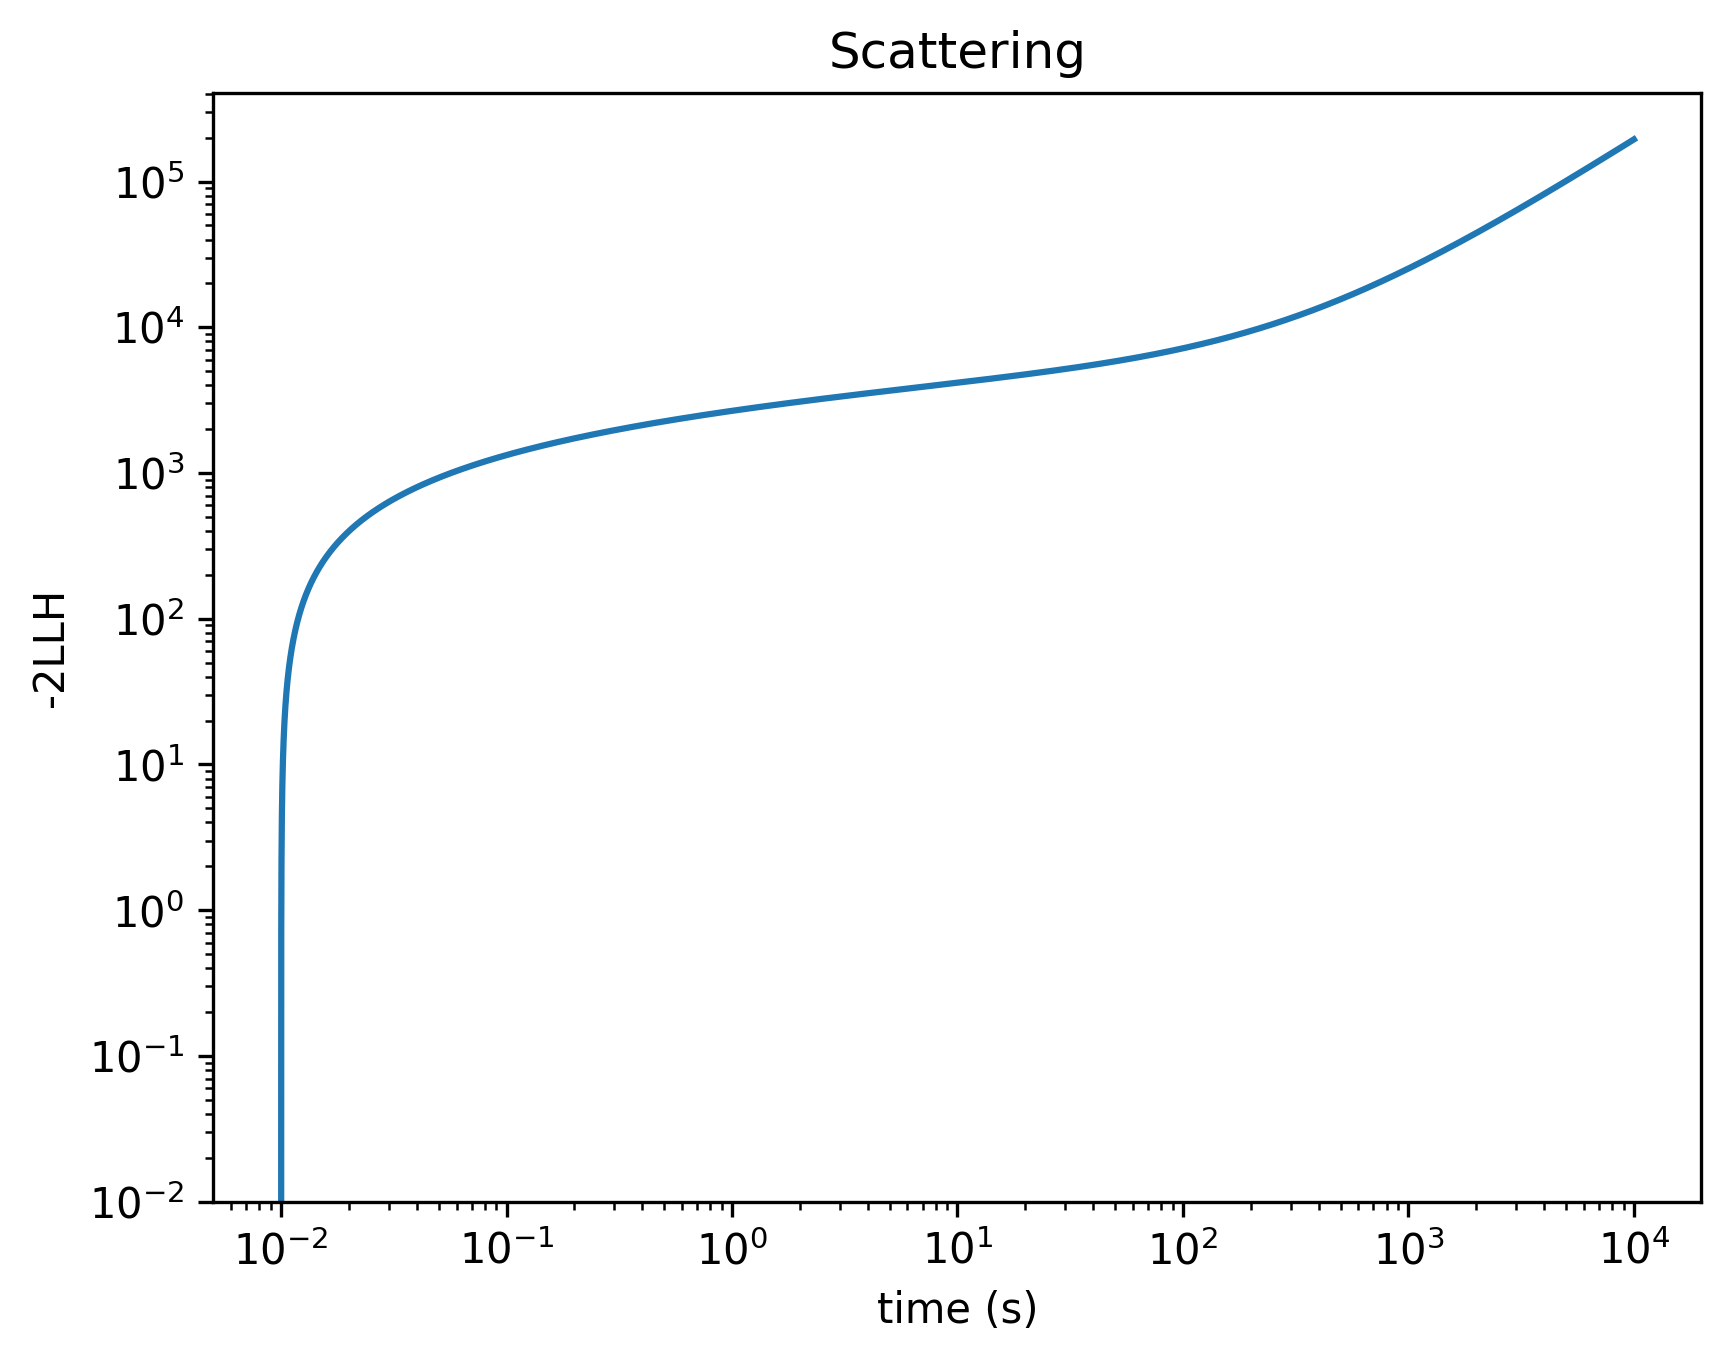

In [84]:

plt.figure(dpi = 300)
plt.plot(timing, nllh_times)
#plt.yscale('log')
plt.title(r'Scattering')
plt.ylabel(r'-2LLH')
plt.xlabel(r'time (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylim(bottom=1e-2)
plt.show()
